In [30]:
# all imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# get work-data
data = pd.read_csv('data/raw_dataset/heart.csv')

# training data & target data
data_training = data.drop(columns=['output'])
target_data = data['output']

print('Dataset:')
print(f'Total length: {len(data)}')
print(f'Amount Attributes: {len(data.columns)} \n')
print('Details: ')
display(data.describe())

Dataset:
Total length: 303
Amount Attributes: 14 

Details: 


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


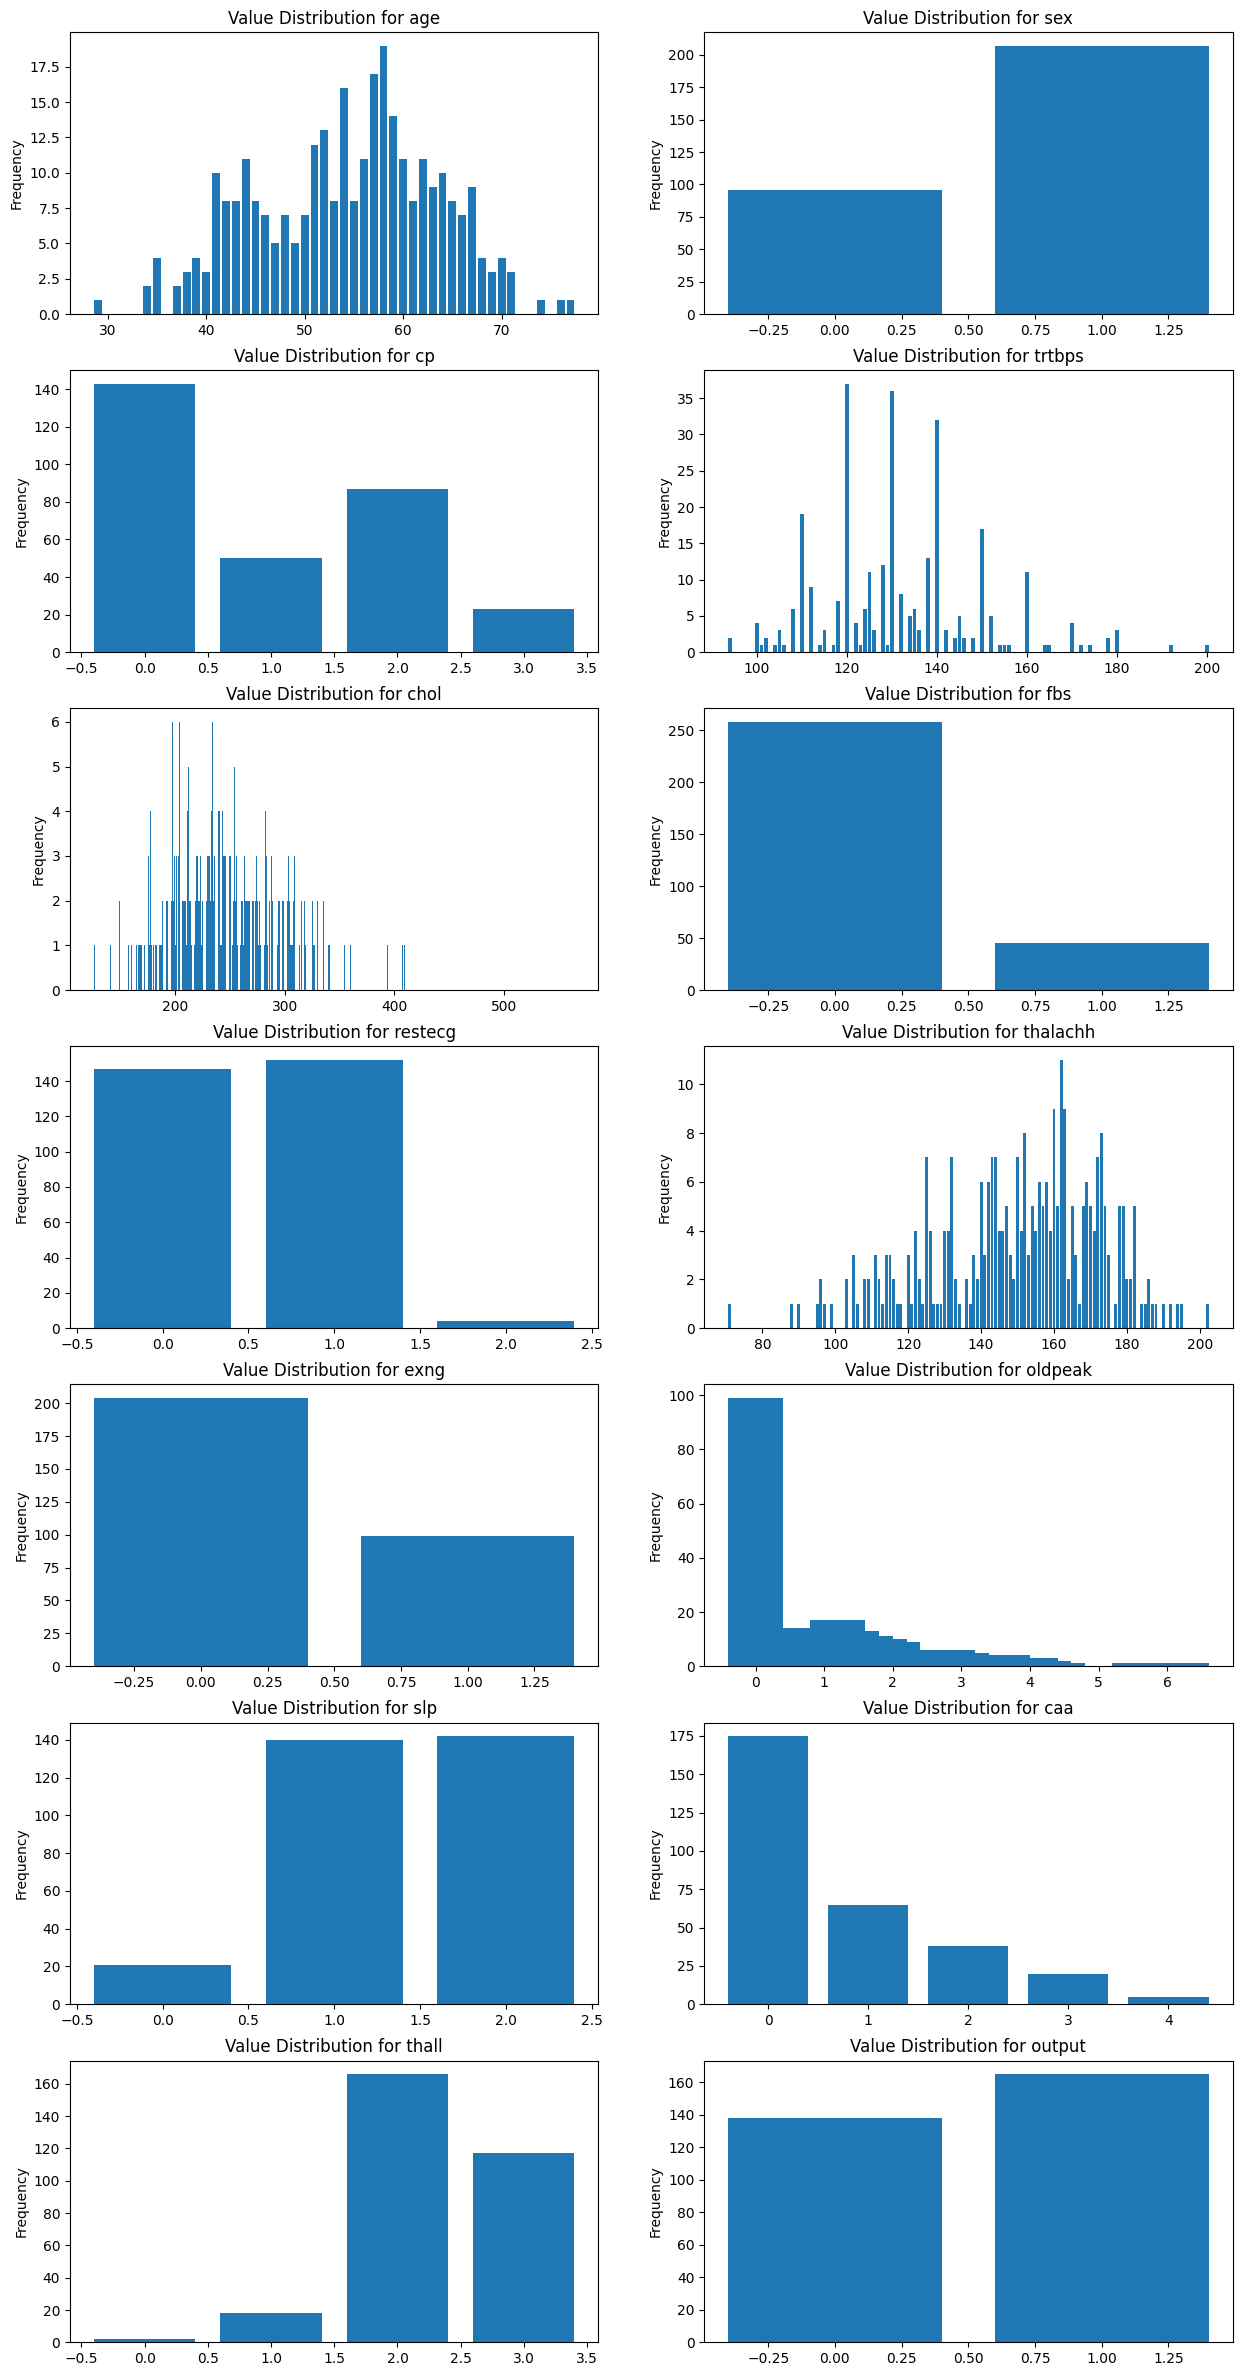

In [32]:
# plot distribution for each attribute

# figure
fig = plt.figure(figsize=(15,30))
    
fig_idx = 1

for c in data.columns:
    # add a sub plot to the figure
    axs = fig.add_subplot(7,2,fig_idx)
    
    # Get value counts for each class
    class_dist = data[c].value_counts().sort_index()

    # bar plot
    axs.bar(class_dist.index, class_dist.values)

    # Set the title
    axs.set_title(f'Value Distribution for {c}')

    # y-label
    axs.set_ylabel('Frequency')
    
    # counter
    fig_idx += 1

plt.show()

# Notes
We can see a lot of not perfect distributions for training.

## Age
- Normal Distribution
Low frequency for each datapoint

## Sex
- Boolean
Double as many male datapoints than women

## cp / chest pain
- 4 value distribution
value 0 has many more than the others

## trtbps / resting blood pressure (in mm Hg)
- random distribution
some outlayers

## chol
- normal distribution
some outlayers

## fbs
- boolean
value 0 many more samples than value 1

## restecg
- 3 values
value 2 has only few samples

## thalach / maximum heart rate achieved
- normal distribution
hard shift to the left

## exng
- boolean
value 0 has many more samples than value 1


# oldpeak
- weird dis
value 0 has a lot more samples than any other values


## slp
- 3 value distribution
value 0 has few samples

## caa
- 4 value distribution
lesser samples than the prev value

## thall
- ... distribution
outlayers

## output
- boolean
seems ok

# Data Preprocessing
## Normalization
For Clustering making sense we need to normalize our dataset

In [33]:
# normalization of dataset
def normalize(data):
    data_norm = pd.DataFrame()
    
    for column in data.columns:
        # parameters needed
        c_min = min(data[column])
        c_max = max(data[column])
        
        data_norm[column] = data[column].apply(lambda x: (x - c_min) / (c_max -c_min))
    
    return data_norm
    
display(normalize(data_training))

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


## Encoding

In [34]:
# encode dataset
encoder = preprocessing.OneHotEncoder()
encoded = pd.DataFrame(encoder.fit_transform(data_training[['cp', 'restecg', 'slp', 'caa', 'thall']]).toarray(), columns=encoder.get_feature_names_out(['cp', 'restecg', 'slp', 'caa', 'thall']))

data_training_prep = data_training.drop(columns=['cp', 'restecg', 'slp', 'caa', 'thall'])
data_training_prep = pd.concat([data_training_prep, encoded], axis=1)

# normalize after encoding
data_training_prep = normalize(data_training_prep)

print('Encoded & normalized: ')
display(data_training_prep)

Encoded & normalized: 


,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.816794,0.0,0.129032,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.702290,1.0,0.096774,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.433962,0.262557,0.0,0.396947,1.0,0.032258,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,0.333333,1.0,0.150943,0.315068,0.0,0.465649,0.0,0.193548,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,0.812500,1.0,0.471698,0.152968,1.0,0.534351,0.0,0.548387,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,0.583333,1.0,0.339623,0.011416,0.0,0.335878,1.0,0.193548,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Classification
Data preperation

In [35]:
# train and test split
data_prep_train, data_prep_test, target_prep_train, target_prep_test = train_test_split(data_training_prep, target_data, test_size=0.2, random_state=42, stratify=target_data)

## K-nearest Neighbour

In [39]:
for i in range(1, 11):
    # estimator
    knn_estimator = KNeighborsClassifier(i)
    
    # training
    knn_estimator.fit(data_prep_train, target_prep_train)
    
    # prediction
    prediction = knn_estimator.predict(data_prep_test)
    
    print("k= {} acc: {}".format(i, accuracy_score(target_prep_test, prediction)))
    print(classification_report(target_prep_test, prediction))

k= 1 acc: 0.7377049180327869
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.73      0.82      0.77        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61

k= 2 acc: 0.7213114754098361
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        28
           1       0.75      0.73      0.74        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

k= 3 acc: 0.7704918032786885
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.74      0.88      0.81        33

    accuracy                           0.77        61
   macro avg       0.78      0.76      0.

In [36]:
# i: 4, 10 ->   recall 0 = 0.86